In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/fraud test.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

In [3]:
### Remove a 50% of data for non-fraud
X = int(round((df['is_fraud'].value_counts()[0]) * 0.75, 0))

non_fraud_rows = df[df['is_fraud'] == 0]
rows_to_remove = non_fraud_rows.sample(n=X, random_state=100)
df = df.drop(rows_to_remove.index)

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
5,21/06/2020 12:15,3.040770e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,...,42.1939,-76.7361,520,Psychotherapist,13/10/1991,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
9,21/06/2020 12:16,3.546900e+15,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,Prairie Hill,...,31.6591,-96.8094,263,Barrister,30/05/1956,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0
10,21/06/2020 12:16,2.242540e+15,"fraud_Feil, Hilpert and Koss",food_dining,7.01,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,Westport,...,38.4921,-85.4524,564,Pensions consultant,10/04/1996,3b8e4d02d9e1a3bf97cf449eb0317f2c,1371816980,38.977546,-84.727994,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140539 entries, 1 to 555717
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  140539 non-null  object 
 1   cc_num                 140539 non-null  float64
 2   merchant               140539 non-null  object 
 3   category               140539 non-null  object 
 4   amt                    140539 non-null  float64
 5   first                  140539 non-null  object 
 6   last                   140539 non-null  object 
 7   gender                 140539 non-null  object 
 8   street                 140539 non-null  object 
 9   city                   140539 non-null  object 
 10  state                  140539 non-null  object 
 11  zip                    140539 non-null  int64  
 12  lat                    140539 non-null  float64
 13  long                   140539 non-null  float64
 14  city_pop               140539 non-null  i

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True)

In [7]:
df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

is_fraud      1.000000
amt           0.374280
lat           0.011937
merch_lat     0.011800
long         -0.001629
merch_long   -0.001800
cc_num       -0.003316
zip          -0.004780
city_pop     -0.009755
unix_time    -0.025847
Name: is_fraud, dtype: float64

In [8]:
drop_cols = ["cc_num", "first", "last", "street", "zip", "trans_num"]

for col in drop_cols:
    df.drop(col, axis=1, inplace=True)


In [9]:
df['year'] = df['trans_date_trans_time'].apply(lambda x: x.year) 
df['month'] = df['trans_date_trans_time'].apply(lambda x: x.month) 
df['day'] = df['trans_date_trans_time'].apply(lambda x: x.day) 
df['hour'] = df['trans_date_trans_time'].apply(lambda x: x.hour)
df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.minute) 
df['second'] = df['trans_date_trans_time'].apply(lambda x: x.second) 

In [10]:
df.drop("trans_date_trans_time", axis=1, inplace=True)

In [11]:
df.drop("job", axis=1, inplace=True)

In [12]:
df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,17/01/1990,1371816873,39.450498,-109.960431,0,2020,6,21,12,14,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,21/10/1970,1371816893,40.495810,-74.196111,0,2020,6,21,12,14,0
5,fraud_Daugherty LLC,kids_pets,19.55,F,Breesport,NY,42.1939,-76.7361,520,13/10/1991,1371816937,41.747157,-77.584197,0,2020,6,21,12,15,0
9,fraud_Kilback Group,food_dining,66.54,F,Prairie Hill,TX,31.6591,-96.8094,263,30/05/1956,1371816971,31.782919,-96.366185,0,2020,6,21,12,16,0
10,"fraud_Feil, Hilpert and Koss",food_dining,7.01,M,Westport,KY,38.4921,-85.4524,564,10/04/1996,1371816980,38.977546,-84.727994,0,2020,6,21,12,16,0


In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.15, random_state=100)

In [14]:
train_set.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
36777,fraud_Mante Group,misc_net,74.61,F,Stirling,NJ,40.6774,-74.4968,2307,11/09/1969,1372921987,40.860881,-74.505528,0,2020,7,4,7,13,0
404387,fraud_Champlin-Casper,home,9.73,F,Altonah,UT,40.3207,-110.4360,302,17/01/1990,1385566337,40.180570,-111.075396,0,2020,11,27,15,32,0
164359,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,9.74,F,Cleveland,TX,30.3300,-95.0202,34153,11/09/1995,1376770185,29.493693,-94.077045,0,2020,8,17,20,9,0
445192,fraud_Wuckert-Goldner,home,67.39,F,Rosewood,OH,40.2158,-83.9579,133,29/01/1954,1386429976,40.980630,-84.565557,0,2020,12,7,15,26,0
226466,"fraud_Heller, Gutmann and Zieme",grocery_pos,117.67,M,Leetsdale,PA,40.5662,-80.2099,1140,20/06/1986,1378795415,40.059978,-80.545566,0,2020,9,10,6,43,0


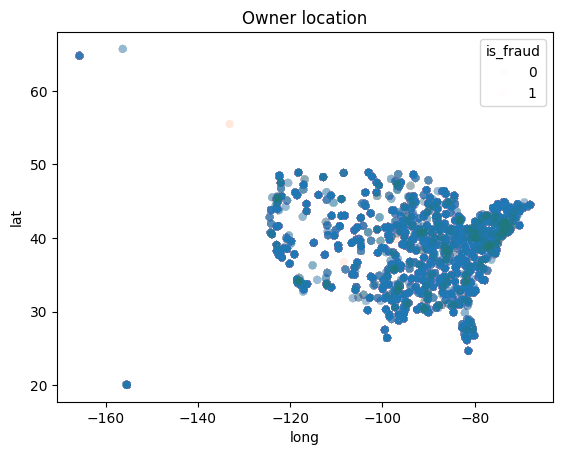

In [15]:
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=train_set, alpha=0.01)
plt.title('Owner location')
plt.show()

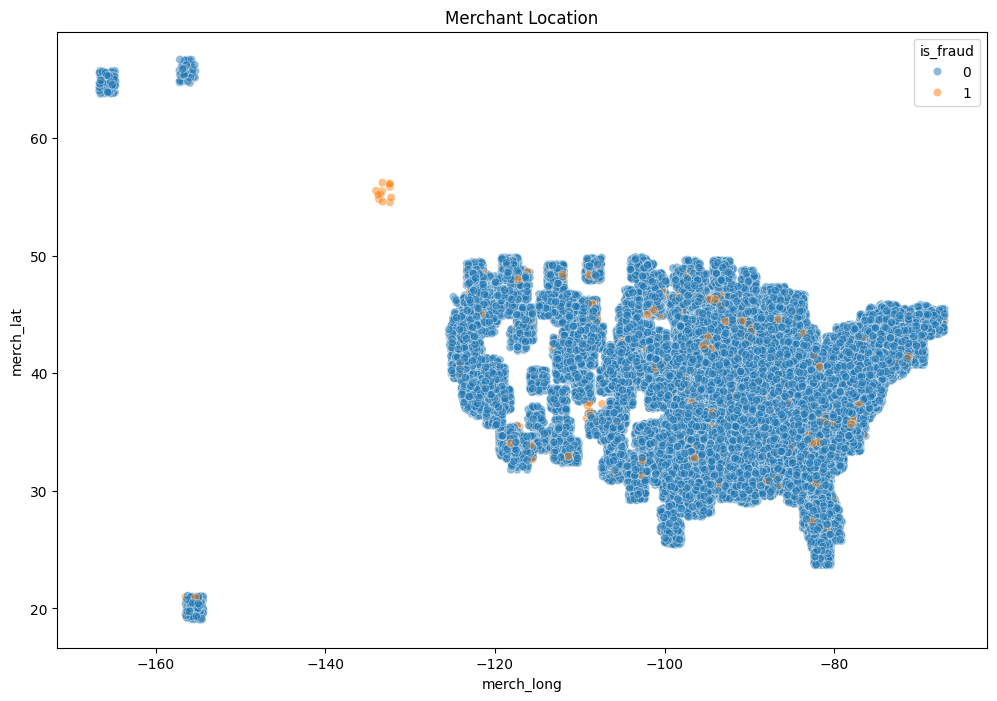

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=train_set, alpha=0.5)
plt.title('Merchant Location')
plt.show()

In [17]:
train_set.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
36777,fraud_Mante Group,misc_net,74.61,F,Stirling,NJ,40.6774,-74.4968,2307,11/09/1969,1372921987,40.860881,-74.505528,0,2020,7,4,7,13,0
404387,fraud_Champlin-Casper,home,9.73,F,Altonah,UT,40.3207,-110.4360,302,17/01/1990,1385566337,40.180570,-111.075396,0,2020,11,27,15,32,0
164359,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,9.74,F,Cleveland,TX,30.3300,-95.0202,34153,11/09/1995,1376770185,29.493693,-94.077045,0,2020,8,17,20,9,0
445192,fraud_Wuckert-Goldner,home,67.39,F,Rosewood,OH,40.2158,-83.9579,133,29/01/1954,1386429976,40.980630,-84.565557,0,2020,12,7,15,26,0
226466,"fraud_Heller, Gutmann and Zieme",grocery_pos,117.67,M,Leetsdale,PA,40.5662,-80.2099,1140,20/06/1986,1378795415,40.059978,-80.545566,0,2020,9,10,6,43,0


In [18]:
train_set['category'].nunique()

14

In [19]:
def set_dummies(col):
    global train_set, test_set
    train_dummies = pd.get_dummies(train_set[col], dtype=int)
    test_dummies = pd.get_dummies(test_set[col], dtype=int)

    train_set = pd.concat([train_set, train_dummies], axis=1)
    train_set.drop(col, axis=1, inplace=True)

    test_set = pd.concat([test_set, test_dummies], axis=1)
    test_set.drop(col, axis=1, inplace=True)
    

In [20]:
set_dummies("gender")
set_dummies("category")

In [21]:
train_set.shape[1] == test_set.shape[1]

True

In [22]:
train_set.drop('dob', inplace=True, axis=1)
test_set.drop('dob', inplace=True, axis=1)

In [23]:
train_set.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

is_fraud          1.000000
amt               0.377026
shopping_net      0.071547
grocery_pos       0.054944
misc_net          0.045442
hour              0.022595
lat               0.011508
merch_lat         0.011400
shopping_pos      0.004326
M                 0.001628
F                -0.001628
long             -0.003347
merch_long       -0.003555
minute           -0.004416
city_pop         -0.008722
grocery_net      -0.009282
travel           -0.009296
gas_transport    -0.011637
misc_pos         -0.014304
personal_care    -0.017511
day              -0.018093
food_dining      -0.021627
entertainment    -0.021722
health_fitness   -0.022157
month            -0.023349
kids_pets        -0.025927
unix_time        -0.025967
home             -0.026765
year                   NaN
second                 NaN
Name: is_fraud, dtype: float64

In [24]:
train_set.drop('city', inplace=True, axis=1)
test_set.drop('city', inplace=True, axis=1)

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119458 entries, 36777 to 151953
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   merchant        119458 non-null  object 
 1   amt             119458 non-null  float64
 2   state           119458 non-null  object 
 3   lat             119458 non-null  float64
 4   long            119458 non-null  float64
 5   city_pop        119458 non-null  int64  
 6   unix_time       119458 non-null  int64  
 7   merch_lat       119458 non-null  float64
 8   merch_long      119458 non-null  float64
 9   is_fraud        119458 non-null  int64  
 10  year            119458 non-null  int64  
 11  month           119458 non-null  int64  
 12  day             119458 non-null  int64  
 13  hour            119458 non-null  int64  
 14  minute          119458 non-null  int64  
 15  second          119458 non-null  int64  
 16  F               119458 non-null  int64  
 17  M          

In [26]:
# merch_dummies = pd.get_dummies(train_set["merchant"], dtype=int)
# merch_dummies = pd.concat([merch_dummies, train_set['is_fraud']], axis=1)

In [27]:
# corr_matrix = merch_dummies.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

In [28]:
# corr_matrix = corr_matrix.apply(np.abs)

In [29]:
# corr_matrix

In [30]:
train_set.drop("merchant", axis=1, inplace=True)
test_set.drop("merchant", axis=1, inplace=True)

In [31]:
set_dummies("state")

In [32]:
train_set.shape[1] == test_set.shape[1]

True

In [33]:
corr_matrix = train_set.corr()['is_fraud'].sort_values(ascending=False)

In [34]:
corr_matrix

is_fraud        1.000000
amt             0.377026
shopping_net    0.071547
grocery_pos     0.054944
misc_net        0.045442
                  ...   
kids_pets      -0.025927
unix_time      -0.025967
home           -0.026765
year                 NaN
second               NaN
Name: is_fraud, Length: 80, dtype: float64

In [35]:
train_set.drop("year", axis=1, inplace=True)
test_set.drop("year", axis=1, inplace=True)

In [36]:
train_set.drop("second", axis=1, inplace=True)
test_set.drop("second", axis=1, inplace=True)

In [37]:
X_train = train_set.drop("is_fraud", axis=1)
y_train = train_set['is_fraud']

X_test = test_set.drop("is_fraud", axis=1)
y_test = test_set['is_fraud']

In [38]:
X_train.shape[0] == y_train.shape[0]

True

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Three Models To start with
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report


In [40]:
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# 

### Logistic Regression

In [43]:
log_reg = LogisticRegression(penalty='l1', solver='saga', C=0.05)

In [107]:
param_grid = {
    # 'penalty': ['l1'],  # Norm used in the penalization
    # 'C': [0.05],  # Inverse of regularization strength
    # 'solver': ['saga'],  # Algorithm to use in the optimization problem
    # 'max_iter': [100, 200, 300],  # Maximum number of iterations taken for the solvers to converge
    # 'l1_ratio': [0.0, 0.5, 1.0]  # Used only if penalty is 'elasticnet'
}

In [108]:
# grid_cv = GridSearchCV(log_reg, param_grid, n_jobs=6, cv=2,  verbose=1)

In [109]:
# grid_cv.fit(X_train_scaled, y_train)

In [110]:
# grid_cv.best_estimator_

In [111]:
best_log_reg = LogisticRegression(penalty='l1', solver='saga', C=0.05)

In [49]:
best_log_reg.fit(X_train_scaled, y_train)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.05, penalty='l1', solver='saga')

In [50]:
y_pred = best_log_reg.predict(X_test_scaled)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20756
           1       0.71      0.20      0.31       325

    accuracy                           0.99     21081
   macro avg       0.85      0.60      0.65     21081
weighted avg       0.98      0.99      0.98     21081



In [53]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[20730    26]
 [  260    65]]


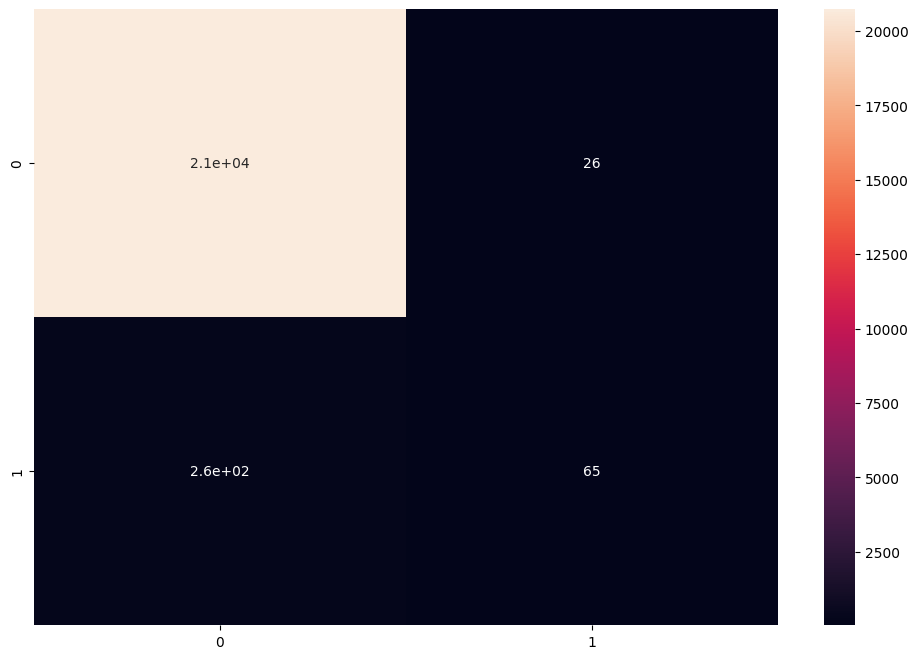

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [55]:
# Function to count combinations
def combos(grid):
    combo_sum = 1
    for key in grid.keys():
        combo_sum *= len(grid[key])

    return combo_sum

### K-Nearest Neighbors

In [95]:
knn = KNeighborsClassifier(weights='distance', algorithm='auto', p=1, metric='manhattan')

In [123]:
param_grid = {
    'n_neighbors': [2, 3],  # Number of neighbors to use
    # 'weights': ['distance'],  # Weight function used in prediction
    # 'algorithm': ['auto'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [4,5,6],  # Leaf size passed to BallTree or KDTree
    # 'p': [1],  # Power parameter for the Minkowski metric
    # 'metric': ['manhattan']  # Distance metric to use
}

print(combos(param_grid) * 2)

12


In [124]:
grid_cv = GridSearchCV(knn, param_grid, cv=2, n_jobs=10, verbose=1)

In [125]:
grid_cv.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2,
             estimator=KNeighborsClassifier(metric='manhattan', p=1,
                                            weights='distance'),
             n_jobs=10,
             param_grid={'leaf_size': [4, 5, 6], 'n_neighbors': [2, 3]},
             verbose=1)

In [126]:
grid_cv.best_params_

{'leaf_size': 4, 'n_neighbors': 3}

In [127]:
best_knn = grid_cv.best_estimator_

In [128]:
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=4, metric='manhattan', n_neighbors=3, p=1,
                     weights='distance')

In [129]:
y_pred = best_knn.predict(X_test_scaled)

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20756
           1       0.88      0.63      0.74       325

    accuracy                           0.99     21081
   macro avg       0.94      0.82      0.87     21081
weighted avg       0.99      0.99      0.99     21081



In [131]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[20727    29]
 [  119   206]]


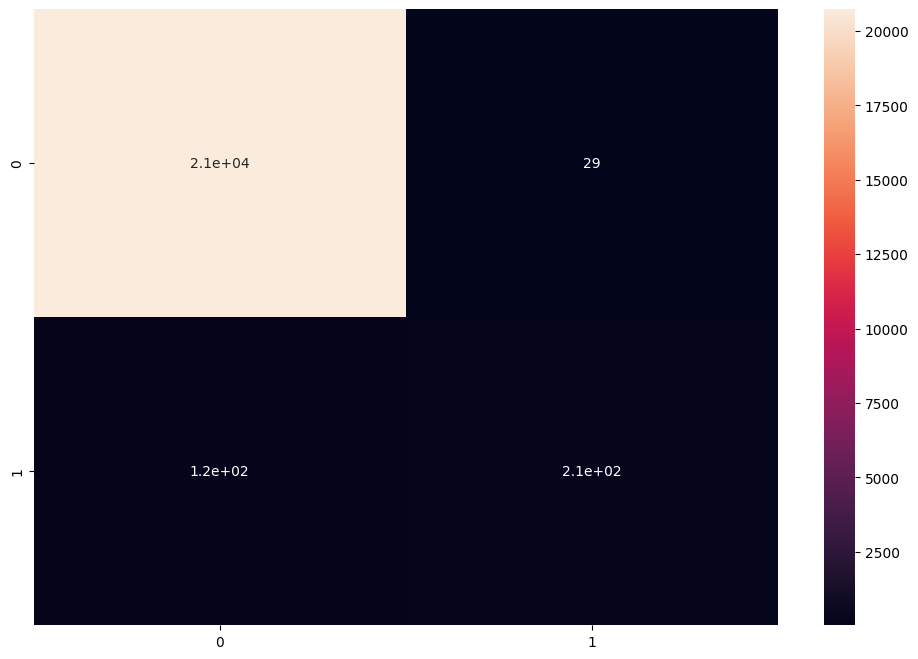

In [132]:
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [133]:
y_test.value_counts()

is_fraud
0    20756
1      325
Name: count, dtype: int64